# Import libraries and setup

In [1]:
# Import libraries we may need
import scanpy as sc
import numpy as np
import scipy as sp
import squidpy as sq
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import scanpy.external as sce
import wget
import yaml
import wget
import astir
import dill
import umap
reducer = umap.UMAP()
import anndata as ad

#My module for importing IMC data into AnnData format
import mikeimc as mimc
import mikeimc_v2 as mikeimc_v2

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
OMP: Info #276: omp_set_nested routine deprecated, please u

In [2]:
# Set up output figure settings
plt.rcParams['figure.figsize']=(64,64) #rescale figures, increase sizehere

# Set up scanpy settings
sc.settings.verbosity = 3
sc.set_figure_params(dpi=100, dpi_save=300) #Increase DPI for better resolution figures
#sc.logging.print_versions()

# Save / restore adatas

In [3]:
# load main adata
adata_subset2 = ad.read_h5ad('./2_h5ad files/adata_subset2')
adata_COVID = ad.read_h5ad('./2_h5ad files/adata_COVID')

In [ ]:
adata_subset2

In [12]:
# save main adata
adata_subset2.write('./2_h5ad files/adata_subset2')

# Subset anndata to plot specfic cell types in COVID+ HIVneg vs COVID+ HIVpos

In [ ]:
#read adata
ad_neutro = ad.read_h5ad('./2_h5ad files/adata_subset2_neutrophil')
ad_macro = ad.read_h5ad('./2_h5ad files/adata_subset2_macrophage')
ad_lymphoid = ad.read_h5ad('./2_h5ad files/adata_subset2_lymphoid')
ad_epithelial = ad.read_h5ad('./2_h5ad files/adata_subset2_epithelial')
ad_stromal = ad.read_h5ad('./2_h5ad files/adata_subset2_stromal')
ad_endothelium = ad.read_h5ad('./2_h5ad files/adata_subset2_endothelium')
ad_RBC = ad.read_h5ad('./2_h5ad files/adata_subset2_RBC')

In [ ]:
#save adata
ad_neutro.write('./2_h5ad files/adata_subset2_neutrophil')
ad_macro.write('./2_h5ad files/adata_subset2_macrophage')
ad_lymphoid.write('./2_h5ad files/adata_subset2_lymphoid')
ad_epithelial.write('./2_h5ad files/adata_subset2_epithelial')
ad_stromal.write('./2_h5ad files/adata_subset2_stromal')
ad_endothelium.write('./2_h5ad files/adata_subset2_endothelium')
ad_RBC.write('./2_h5ad files/adata_subset2_RBC')

In [ ]:
ad_HIV_POS = ad.read_h5ad('./2_h5ad files/ad_HIV_POS')
ad_HIV_NEG = ad.read_h5ad('./2_h5ad files/ad_HIV_NEG')

In [ ]:
ad_HIV_POS.write('./2_h5ad files/ad_HIV_POS')
ad_HIV_NEG.write('./2_h5ad files/ad_HIV_NEG')

In [70]:
col_df = pd.read_csv('mikeimc_approach/colours/pheno_colours2.csv')
colour_palette = col_df.set_index('pheno_cluster_new').to_dict()
colour_palette['colour']

{'SARSCoV2+ ArginaseHighVISTAHigh Activated Neutrophil': '#336600',
 'ArginaseLowVISTALow Neutrophil': '#9cded6',
 'ArginaseLowVISTALow Activated Neutrophil': '#0fcfc0',
 'ArginaseHighVISTAHigh Activated Neutrophil': '#8dd593',
 'RBC': '#f71f0f',
 'Endothelial cell': '#e07b91',
 'Activated Endothelial cell': '#0070C0',
 'Proliferative Endothelial cell': '#fce5cd',
 'Smooth Muscle cell': '#FA8000',
 'Fibroblast': '#b86cb9',
 'Proliferative Fibroblast': '#d33f6a',
 'Apoptotic Fibroblast': '#FF7DA8',
 'SARSCoV2+ Interstitial Macrophage': '#00B0F0',
 'Apoptotic SARSCoV2+  Alveolar Macrophage': '#FFD966',
 'Interstitial Macrophage': '#4a6fe3',
 'Proliferating Interstitial Macrophage': '#4900EF',
 'Alveolar Macrophage': '#A381EF',
 'Apoptotic Alveolar Macrophage': '#8595e1',
 'CD11c+ cell': '#b5bbe3',
 'Classical Monocyte': '#b86cb9',
 'AT2 cell': '#d6bcc0',
 'SARSCoV2+ AT2 cell': '#A53F02',
 'SARSCoV2+ Epithelial cell': '#b9877d',
 'Epithelial cell': '#f0b98d',
 'Proliferative Epithelial ce

# Analysis of Neutrophils

In [ ]:
ad_neutro

In [ ]:
#Plot heatmap  with the same markers used to identify neutrophil clusters

markers = ['Arginase1','CD11b', 'CD11c', 'CD14', 'CD16', 'CD163', 'CD206', 'CD45', 'CD66b', 'CD68', 'Iba1', 'CD74', 'MHCII', 'MHCI', 'Vista', 
                   'iNOS', 'CD38','CD107a', 'GranzymeB', 'Ki67', 'ClvdCaspase3', 'SARSCoV2']
sc.tl.dendrogram(ad_neutro, groupby = 'pheno_cluster')
sc.pl.heatmap(ad_neutro, markers, groupby='pheno_cluster', cmap='viridis', swap_axes=False, dendrogram=True, save='_neutrophil_clusters.pdf')

In [ ]:
#Compute a ranking for the highly differential markers in each cluster
#To identify differentially expressed genes we run sc.tl.rank_genes_groups. 
#This function will take each group of cells and compare the distribution of each gene in a group against the distribution in all other cells not in the group. 
sc.tl.rank_genes_groups(ad_neutro, 'pheno_cluster', reference='rest', method='wilcoxon', corr_method='benjamini-hochberg', pts=True)

In [ ]:
sc.set_figure_params(dpi=100, dpi_save=300)
sc.pl.violin(ad_neutro, ['MHCI','iNOS', 'CD38', 'CD107a', 'GranzymeB', 'ClvdCaspase3'], 
             groupby='pheno_cluster', rotation=90, save='neutrophil_specificmarkers_wilcoxon.pdf')


In [ ]:
#subset based on COVID+ HIVNeg vs HIVPos
ad_neutro2 = ad_neutro[ad_neutro.obs['Group'].isin(['COVID-19']),:].copy()


In [ ]:
ad_neutro2.obs['Group']

In [ ]:
#stack bar code and extracting number of cells, distribution of each cluster per case or the cluster composition per case
#for number of cells - don't use normalize
#for distribution of each case per cluster - use normalize = "index"
#for cluster composition per case - use normalize = "columns"
tmp = pd.crosstab(ad_neutro2.obs['pheno_cluster'], ad_neutro2.obs['HIV'], margins=False, margins_name='Total', normalize="columns")

In [ ]:
tmp2 = tmp.reindex(['ArginaseLowVISTALow Neutrophil', 'GrBLowArginaseLowVISTALow Activated Neutrophil',
                    'GrBHighArginaseLowVISTALow Activated Neutrophil', 
                    'GrBHighArginaseHighVISTAHigh Activated Neutrophil',
                    'SARSCoV2+ ArginaseHighVISTAHigh Activated Neutrophil'])

In [ ]:
tmp3 = pd.DataFrame.transpose(tmp2)

In [ ]:
#color for stack bars for the disease groups matching the other bar graphs
#F08080 - light coral
#87CEFA - lightskyblue
#D3D3D3 - lightgrey

pretty_colors = ['#F08080','#87CEFA','#D3D3D3']
color_pal = sb.color_palette('Paired', 8)

tmp3.plot.bar(stacked=True, color=color_pal, figsize=(4, 4), rot=0).legend(bbox_to_anchor=(1, 1))

# Analysis of Macrophages

In [ ]:
#subset based on COVID+ HIVNeg vs HIVPos
ad_macro2 = ad_macro[ad_macro.obs['Group'].isin(['COVID-19']),:].copy()

In [ ]:
ad_macro2.obs['Group']

In [ ]:
#stack bar code and extracting number of cells, distribution of each cluster per case or the cluster composition per case
#for number of cells - don't use normalize
#for distribution of each case per cluster - use normalize = "index"
#for cluster composition per case - use normalize = "columns"
tmp = pd.crosstab(ad_macro2.obs['pheno_cluster'], ad_macro2.obs['HIV'], margins=False, margins_name='Total', normalize="columns")

In [ ]:
tmp3 = pd.DataFrame.transpose(tmp)

In [ ]:
#color for stack bars for the disease groups matching the other bar graphs
#F08080 - light coral
#87CEFA - lightskyblue
#D3D3D3 - lightgrey

pretty_colors = ['#F08080','#87CEFA','#D3D3D3']
color_pal = sb.color_palette('Paired', 8)

tmp3.plot.bar(stacked=True, color=color_pal, figsize=(4, 4), rot=0).legend(bbox_to_anchor=(1, 1))

# Analysis of Lymphoid cells

In [ ]:
#subset based on COVID+ HIVNeg vs HIVPos
ad_lympho2 = ad_lymphoid[ad_lymphoid.obs['Group'].isin(['COVID-19']),:].copy()

In [ ]:
tmp = pd.crosstab(ad_lympho2.obs['pheno_cluster'], ad_lympho2.obs['HIV'], margins=False, margins_name='Total', normalize="columns")

In [ ]:
tmp3 = pd.DataFrame.transpose(tmp)

In [ ]:
pretty_colors = ['#F08080','#87CEFA','#D3D3D3']
color_pal = sb.color_palette('Paired', 8)

tmp3.plot.bar(stacked=True, color=color_pal, figsize=(4, 4), rot=0).legend(bbox_to_anchor=(1, 1))

# Analysis of Epithelial cells

In [ ]:
#subset based on COVID+ HIVNeg vs HIVPos
ad_epithelial2 = ad_epithelial[ad_epithelial.obs['Group'].isin(['COVID-19']),:].copy()

In [ ]:
tmp = pd.crosstab(ad_epithelial2.obs['pheno_cluster'], ad_epithelial2.obs['HIV'], margins=False, margins_name='Total', normalize="columns")

In [ ]:
tmp3 = pd.DataFrame.transpose(tmp)

In [ ]:
pretty_colors = ['#F08080','#87CEFA','#D3D3D3']
color_pal = sb.color_palette('Paired', 8)

tmp3.plot.bar(stacked=True, color=color_pal, figsize=(4, 4), rot=0).legend(bbox_to_anchor=(1, 1))

# Analysis of Endothelial cells

In [ ]:
#subset based on COVID+ HIVNeg vs HIVPos
ad_endotheliuml2 = ad_endothelium[ad_endothelium.obs['Group'].isin(['COVID-19']),:].copy()

tmp = pd.crosstab(ad_endotheliuml2.obs['pheno_cluster'], ad_endotheliuml2.obs['HIV'], margins=False, margins_name='Total', normalize="columns")

tmp3 = pd.DataFrame.transpose(tmp)

In [ ]:
pretty_colors = ['#F08080','#87CEFA','#D3D3D3']
color_pal = sb.color_palette('Paired', 8)

tmp3.plot.bar(stacked=True, color=color_pal, figsize=(4, 4), rot=0).legend(bbox_to_anchor=(1, 1))

# Analysis of Stromal cells

In [ ]:
#subset based on COVID+ HIVNeg vs HIVPos
ad_stromal2 = ad_stromal[ad_stromal.obs['Group'].isin(['COVID-19']),:].copy()

tmp = pd.crosstab(ad_stromal2.obs['pheno_cluster'], ad_stromal2.obs['HIV'], margins=False, margins_name='Total', normalize="columns")

tmp3 = pd.DataFrame.transpose(tmp)

In [ ]:
pretty_colors = ['#F08080','#87CEFA','#D3D3D3']
color_pal = sb.color_palette('Paired', 8)

tmp3.plot.bar(stacked=True, color=color_pal, figsize=(4, 4), rot=0).legend(bbox_to_anchor=(1, 1))

# Comparisons based on Histopathology

In [ ]:
adata_subset2.obs['CaseID']

In [ ]:
# Set `skip_data=False` if you also want to export the data.
adata_subset2.write_csvs(dirname='./1_CSV files/adata_subset2', skip_data=False)

In [ ]:
# Adding histology annotations 
anno = pd.read_csv(filepath_or_buffer='./1_CSV files/adata_subset2/obs.csv', index_col=0)

In [ ]:
anno.index

In [ ]:
adata_subset2.obs.index

In [ ]:
anno['Histo'].values

In [ ]:
adata_subset2.obs['Histo'] = anno['Histo'].values

In [ ]:
adata_subset2.obs['Histo']

In [6]:
adata_subset2.obs

,Master_Index,ROI,TMAID,CaseID,Region,Patient,Group,Diagnosis,X_loc,Y_loc,umap_density_Group,cell_type,hierarchy,pheno_cluster,HIV,Histo,pheno_cluster_new
18,18,0205_1_A,COS-0205,COS-002-05-J1,COS-02-Right,COS-02,Non_Pneumonia,Sepsis,208.923077,16.423077,0.320959,Macrophage,Myeloid,Alveolar Macrophage,HIV_Pos,Lymphoplasmacytic inflammation,Alveolar Macrophage
28,28,0205_1_A,COS-0205,COS-002-05-J1,COS-02-Right,COS-02,Non_Pneumonia,Sepsis,155.384615,26.615385,0.329502,Fibroblast,Stromal,Fibroblast,HIV_Pos,Lymphoplasmacytic inflammation,Fibroblast
30,30,0205_1_A,COS-0205,COS-002-05-J1,COS-02-Right,COS-02,Non_Pneumonia,Sepsis,284.500000,27.500000,0.244718,Smooth Muscle Cell,Stromal,Smooth Muscle cell,HIV_Pos,Lymphoplasmacytic inflammation,Smooth Muscle cell
31,31,0205_1_A,COS-0205,COS-002-05-J1,COS-02-Right,COS-02,Non_Pneumonia,Sepsis,290.500000,28.000000,0.231831,Smooth Muscle Cell,Stromal,Smooth Muscle cell,HIV_Pos,Lymphoplasmacytic inflammation,Smooth Muscle cell
34,34,0205_1_A,COS-0205,COS-002-05-J1,COS-02-Right,COS-02,Non_Pneumonia,Sepsis,276.155172,28.293103,0.351050,Smooth Muscle Cell,Stromal,Smooth Muscle cell,HIV_Pos,Lymphoplasmacytic inflammation,Smooth Muscle cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185615,185615,1607_3_C,COS-1607,COS-016-07-J1,COS-016-Left,COS-016,Non_Pneumonia,Stroke,75.571429,662.785714,0.184201,Macrophage,Myeloid,CD11c+ cell,HIV_Neg,No lung pathology,CD11c+ cell
185617,185617,1607_3_C,COS-1607,COS-016-07-J1,COS-016-Left,COS-016,Non_Pneumonia,Stroke,95.210526,666.000000,0.490538,Endothelium,Vascular,Endothelial cell,HIV_Neg,No lung pathology,Endothelial cell
185618,185618,1607_3_C,COS-1607,COS-016-07-J1,COS-016-Left,COS-016,Non_Pneumonia,Stroke,111.428571,666.457143,0.528906,Fibroblast,Stromal,Fibroblast,HIV_Neg,No lung pathology,Fibroblast
185622,185622,1607_3_C,COS-1607,COS-016-07-J1,COS-016-Left,COS-016,Non_Pneumonia,Stroke,103.750000,673.522727,0.077341,CD8 cells,Lymphoid,EM CD8 T cell,HIV_Neg,No lung pathology,EM CD8 T cell


In [7]:
#Re-annotation of the histo annotations

histo_dict = pd.read_csv('mikeimc_approach/Dictionaries/covid_histo_anno_new_dict.csv')
ep = histo_dict.set_index('Histo').to_dict()

adata_subset2.obs['Histo_new']=adata_subset2.obs['Histo'].map(ep['Histo_new'])

adata_subset2.obs['Histo_new']=adata_subset2.obs['Histo_new'].astype('category')


In [8]:
adata_subset2.obs['Histo_new']

18        Lymphoplasmacytic inflammation
28        Lymphoplasmacytic inflammation
30        Lymphoplasmacytic inflammation
31        Lymphoplasmacytic inflammation
34        Lymphoplasmacytic inflammation
                       ...              
185615                 No lung pathology
185617                 No lung pathology
185618                 No lung pathology
185622                 No lung pathology
185636                 No lung pathology
Name: Histo_new, Length: 76369, dtype: category
Categories (13, object): ['Cancer', 'DAD with alveolar macrophages', 'DAD with alveolar macrophages and fibrin', 'DAD with fibrin', ..., 'Lymphoplasmacytic inflammation', 'No lung pathology', 'No tissue', 'T2H']

In [9]:
# Exclude RBCs
ad_subset2 = adata_subset2[~adata_subset2.obs['cell_type'].isin(['RBCs']),:].copy()

In [10]:
# Exclude some of the histo lesions
ad_subset2 = ad_subset2[~ad_subset2.obs['Histo_new'].isin(['Lymphocytes and macrophages', 'Cancer', 'No tissue']),:].copy()

In [11]:
ad_subset2.obs['Histo_new']

18        Lymphoplasmacytic inflammation
28        Lymphoplasmacytic inflammation
30        Lymphoplasmacytic inflammation
31        Lymphoplasmacytic inflammation
34        Lymphoplasmacytic inflammation
                       ...              
185615                 No lung pathology
185617                 No lung pathology
185618                 No lung pathology
185622                 No lung pathology
185636                 No lung pathology
Name: Histo_new, Length: 64337, dtype: category
Categories (10, object): ['DAD with alveolar macrophages', 'DAD with alveolar macrophages and fibrin', 'DAD with fibrin', 'DAD with fibrinopurulent inflammation', ..., 'Haemorrhagic DAD with thrombi', 'Lymphoplasmacytic inflammation', 'No lung pathology', 'T2H']

In [61]:
ad_subset2.obs['pheno_cluster_new']

18        Alveolar Macrophage
28                 Fibroblast
30         Smooth Muscle cell
31         Smooth Muscle cell
34         Smooth Muscle cell
                 ...         
185615            CD11c+ cell
185617       Endothelial cell
185618             Fibroblast
185622          EM CD8 T cell
185636                 B cell
Name: pheno_cluster_new, Length: 64337, dtype: category
Categories (32, object): ['AT2 cell', 'Activated Endothelial cell', 'Alveolar Macrophage', 'Apoptotic Alveolar Macrophage', ..., 'SARSCoV2+ ArginaseHighVISTAHigh Activated Neu..., 'SARSCoV2+ Epithelial cell', 'SARSCoV2+ Interstitial Macrophage', 'Smooth Muscle cell']

In [ ]:
COVID = ad_subset2[ad_subset2.obs['Group'].isin(['COVID-19']),:].copy()

In [ ]:
COVID

In [ ]:
COVID.obs['Variant'] = adata_COVID.obs['Variant']

In [ ]:
COVID.obs['Histo_new']

In [75]:
# Split the composition plot per lesion into immune and stromal compartments.

adata_subset2_immune = adata_subset2[adata_subset2.obs['hierarchy'].isin(['Lymphoid', 'Myeloid']),:].copy()
adata_subset2_stromal = adata_subset2[adata_subset2.obs['hierarchy'].isin(['Stromal', 'Vascular']),:].copy()

In [ ]:
tmp = pd.crosstab(ad_covid.obs['Histo'],ad_covid.obs['HIV'], margins=False, margins_name='Total', normalize='columns')

In [79]:
tmp = pd.crosstab(adata_subset2_stromal.obs['pheno_cluster_new'],adata_subset2_stromal.obs['Histo_new'], margins=False, margins_name='Total', normalize='columns')

In [13]:
tmp = pd.crosstab(ad_subset2.obs['Histo_new'],ad_subset2.obs['Group'], margins=False, margins_name='Total', normalize='columns')

In [14]:
tmp

Group,COVID-19,Non_Pneumonia,Pneumonia
Histo_new,,,
DAD with alveolar macrophages,0.076115,0.000000,0.000000
DAD with alveolar macrophages and fibrin,0.015580,0.000000,0.000000
DAD with fibrin,0.097293,0.000000,0.014601
DAD with fibrinopurulent inflammation,0.045153,0.000000,0.879889
Fibrosis,0.362099,0.000000,0.041804
Haemorrhages,0.000000,0.082550,0.000000
Haemorrhagic DAD with thrombi,0.031101,0.000000,0.000000
Lymphoplasmacytic inflammation,0.013854,0.087045,0.000000
No lung pathology,0.160666,0.830405,0.063706


In [67]:
tmp2 = tmp.reindex(['SARSCoV2+ Interstitial Macrophage', 'Apoptotic SARSCoV2+  Alveolar Macrophage', 'SARSCoV2+ ArginaseHighVISTAHigh Activated Neutrophil', 
                    'Classical Monocyte',  'CD11c+ cell', 'ArginaseLowVISTALow Neutrophil', 'ArginaseLowVISTALow Activated Neutrophil', 
                    'ArginaseHighVISTAHigh Activated Neutrophil', 'Alveolar Macrophage', 'Apoptotic Alveolar Macrophage', 'Interstitial Macrophage', 
                    'Proliferating Interstitial Macrophage', 'EM CD4 T cell', 'Proliferative CD4 T cell', 'CD4 Treg cell', 'CD8 T cell', 'EM CD8 T cell', 
                    'Proliferative CD8 T cell' , 'CD3+ cell', 'B cell'])

In [81]:
tmp2 = tmp.reindex(['SARSCoV2+ Epithelial cell', 'SARSCoV2+ AT2 cell',
                    'Activated Endothelial cell', 'Fibroblast', 'Proliferative Fibroblast', 'Apoptotic Fibroblast',  
                     'AT2 cell', 'Epithelial cell' , 'Proliferative Epithelial cell',
                   'Endothelial cell', 'Proliferative Endothelial cell', 'Smooth Muscle cell', 'RBC'])

In [15]:
tmp2 = tmp.reindex(['T2H', 'DAD with alveolar macrophages', 
                     'DAD with alveolar macrophages and fibrin',
                     'DAD with fibrin', 'DAD with fibrinopurulent inflammation', 'Fibrosis', 
                   'Haemorrhages', 'Haemorrhagic DAD with thrombi',
                   'Lymphoplasmacytic inflammation',
                   'No lung pathology'])

In [16]:
tmp2

Group,COVID-19,Non_Pneumonia,Pneumonia
Histo_new,,,
T2H,0.198138,0.000000,0.000000
DAD with alveolar macrophages,0.076115,0.000000,0.000000
DAD with alveolar macrophages and fibrin,0.015580,0.000000,0.000000
DAD with fibrin,0.097293,0.000000,0.014601
DAD with fibrinopurulent inflammation,0.045153,0.000000,0.879889
Fibrosis,0.362099,0.000000,0.041804
Haemorrhages,0.000000,0.082550,0.000000
Haemorrhagic DAD with thrombi,0.031101,0.000000,0.000000
Lymphoplasmacytic inflammation,0.013854,0.087045,0.000000


In [86]:
tmp3 = tmp2.reindex(index=tmp2.index[::-1])

In [17]:
tmp4 = pd.DataFrame.transpose(tmp2)

In [18]:
tmp4

Histo_new,T2H,DAD with alveolar macrophages,DAD with alveolar macrophages and fibrin,DAD with fibrin,DAD with fibrinopurulent inflammation,Fibrosis,Haemorrhages,Haemorrhagic DAD with thrombi,Lymphoplasmacytic inflammation,No lung pathology
Group,,,,,,,,,,
COVID-19,0.198138,0.076115,0.01558,0.097293,0.045153,0.362099,0.00000,0.031101,0.013854,0.160666
Non_Pneumonia,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.08255,0.000000,0.087045,0.830405
Pneumonia,0.000000,0.000000,0.00000,0.014601,0.879889,0.041804,0.00000,0.000000,0.000000,0.063706


In [ ]:
#tmp5 = tmp4.reindex(['T2H', 'DAD with alveolar macrophages', 
                     'DAD with alveolar macrophages and fibrin',
                     'DAD with fibrin', 'DAD with fibrinopurulent inflammation', 'Fibrosis', 
                   'Haemorrhages', 'Haemorrhagic DAD with thrombi',
                   'Lymphoplasmacytic inflammation',
                   'No lung pathology'])

In [ ]:
#tmp5

In [21]:
tmp5 = tmp4.reindex(['Non_Pneumonia', 'COVID-19', 'Pneumonia'])

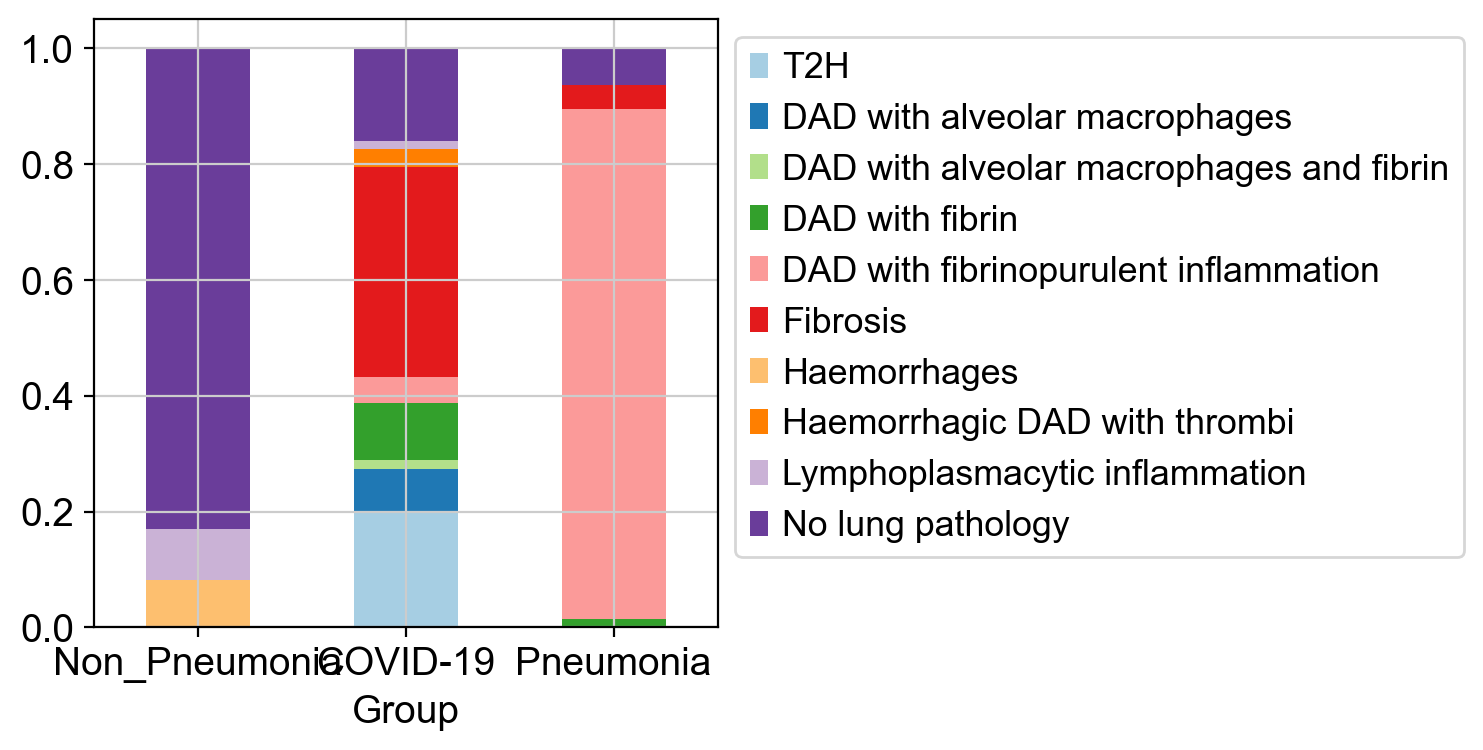

In [27]:
#color for stack bars for the disease groups matching the other bar graphs
#F08080 - light coral
#87CEFA - lightskyblue
#D3D3D3 - lightgrey

pretty_colors = ['#F08080','#87CEFA','#D3D3D3']
color_pal = sb.color_palette('Paired')
#colour_palette['colour']

#sb.set_style("whitegrid", {'axes.grid' : True})
tmp5.plot.bar(stacked=True, color=color_pal, figsize=(4, 4), rot=0).legend(bbox_to_anchor=(1, 1))
plt.savefig("Frequency_histo_annotations_group.pdf", format="pdf", bbox_inches="tight")

Frequency of lesions per clinical condition

In [ ]:
# Split the composition plot per lesion into immune and stromal compartments.

Frequency of lesions in beta vs delta

In [ ]:
# Add beta and delta info in the adata
# Split the composition plot per lesion into immune and stromal compartments.

